In [62]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [63]:
filename = 'sample_df.xlsx'
tweet = pd.read_excel(filename)

In [64]:
tweet.head()

,Unnamed: 0,sentiment,content
0,0,empty,@tiffanylue i know i was listenin to bad habi...
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,2,sadness,Funeral ceremony...gloomy friday...
3,3,enthusiasm,wants to hang out with friends SOON!
4,4,neutral,@dannycastillo We want to trade with someone w...


In [65]:
tweet.shape

(40000, 3)

In [66]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40000 non-null  int64 
 1   sentiment   40000 non-null  object
 2   content     40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [67]:
np.unique(tweet['sentiment'])

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [68]:
len(np.unique(tweet['sentiment']))

13

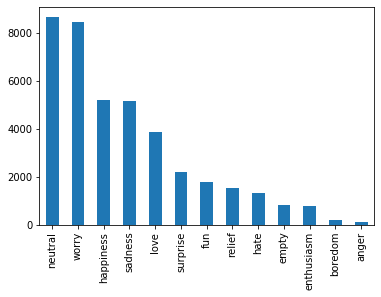

In [69]:
tweet['sentiment'].value_counts().plot.bar()

In [70]:
df = tweet.groupby(['sentiment']).agg(['count'])

In [71]:
df

,Unnamed: 0,content
,count,count
sentiment,,
anger,110,110
boredom,179,179
empty,827,827
enthusiasm,759,759
fun,1776,1776
happiness,5209,5209
hate,1323,1323
love,3842,3842


In [72]:
all_emotions = list(np.unique(tweet['sentiment']))
print("all emotions: ",all_emotions)

#chosen emotion based on count if the count is greater than 3500
chosen_emotions = ['worry','happiness','sadness','neutral','love']
print("chosen emotions",chosen_emotions)

all emotions:  ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
chosen emotions ['worry', 'happiness', 'sadness', 'neutral', 'love']


In [73]:
tweet.isnull().sum()

Unnamed: 0    0
sentiment     0
content       0
dtype: int64

In [74]:
data = tweet[tweet['sentiment'].isin(chosen_emotions)]

In [75]:
data.shape

(31313, 3)

In [76]:
data.head()

,Unnamed: 0,sentiment,content
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,2,sadness,Funeral ceremony...gloomy friday...
4,4,neutral,@dannycastillo We want to trade with someone w...
5,5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,6,sadness,"I should be sleep, but im not! thinking about ..."


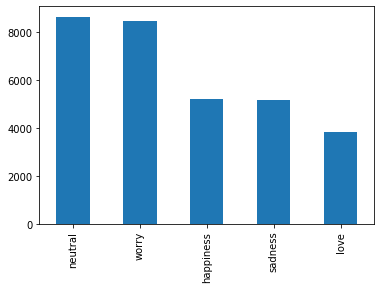

In [77]:
data['sentiment'].value_counts().plot.bar()

In [78]:
data["content"] = data["content"].str.lower()

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
data.head()

,Unnamed: 0,sentiment,content
1,1,sadness,layin n bed with a headache ughhhh...waitin o...
2,2,sadness,funeral ceremony...gloomy friday...
4,4,neutral,@dannycastillo we want to trade with someone w...
5,5,worry,re-pinging @ghostridah14: why didn't you go to...
6,6,sadness,"i should be sleep, but im not! thinking about ..."


In [80]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [81]:
#removing the punctuations marks
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import TextBlob

lemmatizer=WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
stopwds = set(stopwords.words('english')) 
print(stopwds)

def text_pre(text):

    r = re.compile('<.*?>')
    text = re.sub(r, ' ', text)        
    text = re.sub(r'[?|!|\'|"|#|@|$|*]',r'',text)
    text = re.sub(r'[.|,|-|_)|(|\|/]',r' ',text)
    text = re.sub('W*dw*','',text)
    text = expandContractions(text)
    #textBlb = TextBlob(text)            
    #text = textBlb.correct()
    
    text = [word for word in text.split() if word not in stopwds]
    
    pos_text = nltk.pos_tag(text)
    
    text = [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text]
    #text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopwds]
    
    text = ' '.join(text)
    
    return text

data["content"] = data["content"].apply(lambda content: text_pre(content))

{'an', 'will', 'mustn', 'ourselves', 'above', 'herself', 'with', 'just', 'where', "that'll", 'here', 'until', 'once', 'such', "mustn't", 'some', 'at', 'been', 'both', 'while', 'they', 'being', 'having', 'now', 'her', 'is', 'down', "hasn't", 'weren', 've', 't', "you've", 'myself', 'shouldn', "haven't", 'should', 'has', 'needn', 'from', 'under', 'me', 'about', 'aren', 'm', 'out', 'll', 'my', 'its', 'we', 'too', 'after', "you'll", 'into', 'how', 'd', 'hadn', "shan't", 'few', "shouldn't", "won't", 'no', 'whom', 'before', "you'd", 'haven', 'why', 'most', 'up', 'so', 'were', 'won', 'your', 'on', 'ain', "doesn't", 'hasn', 'other', 'he', 'theirs', 'or', 'who', 'more', 'below', 'mightn', 'himself', 'them', 'these', "mightn't", 'do', 'when', 'wouldn', 'couldn', 'those', 'that', "needn't", 'not', 'ours', 'o', "wasn't", 'in', 'ma', "you're", 'she', 'itself', "wouldn't", "aren't", "she's", "it's", 'their', 'nor', 'same', 'y', 'then', 'does', 'again', 's', 'for', "should've", 'the', 'yours', 'of', '

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
data.head()

,Unnamed: 0,sentiment,content
1,1,sadness,layin n heaache ughhhh waitin call
2,2,sadness,funeral ceremony gloomy friay
4,4,neutral,annycastillo want trae someone houston ticket one
5,5,worry,re-pinging ghostriah14: int go prom bc bf int ...
6,6,sadness,shoul sleep im think ol frien want he marrie a...


In [83]:
data.drop('Unnamed: 0',inplace=True,axis=1)

C:\Users\srira\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
data.isnull().sum()

sentiment    0
content      0
dtype: int64

In [85]:
data['sentiment'] = data.sentiment.astype('category')

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31313 entries, 1 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentiment  31313 non-null  category
 1   content    31313 non-null  object  
dtypes: category(1), object(1)
memory usage: 520.0+ KB


In [87]:
data['sentiment'] = pd.Categorical(data.sentiment)

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
data.head()

,sentiment,content
1,sadness,layin n heaache ughhhh waitin call
2,sadness,funeral ceremony gloomy friay
4,neutral,annycastillo want trae someone houston ticket one
5,worry,re-pinging ghostriah14: int go prom bc bf int ...
6,sadness,shoul sleep im think ol frien want he marrie a...


In [89]:
data['sent_id'] = data.sentiment.cat.codes

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
data.head()

,sentiment,content,sent_id
1,sadness,layin n heaache ughhhh waitin call,3
2,sadness,funeral ceremony gloomy friay,3
4,neutral,annycastillo want trae someone houston ticket one,2
5,worry,re-pinging ghostriah14: int go prom bc bf int ...,4
6,sadness,shoul sleep im think ol frien want he marrie a...,3


In [91]:
data["sent_id"].value_counts()

2    8638
4    8459
0    5209
3    5165
1    3842
Name: sent_id, dtype: int64

In [92]:
#data["content"] = data["content"].apply(lambda content: text_pre(content))

In [93]:
data.head()

,sentiment,content,sent_id
1,sadness,layin n heaache ughhhh waitin call,3
2,sadness,funeral ceremony gloomy friay,3
4,neutral,annycastillo want trae someone houston ticket one,2
5,worry,re-pinging ghostriah14: int go prom bc bf int ...,4
6,sadness,shoul sleep im think ol frien want he marrie a...,3


In [94]:
from tensorflow.keras.utils import to_categorical
X = data['content']
y = data['sent_id']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_test = to_categorical(Y_test)
y_train = to_categorical(Y_train)

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(X_train,maxlen = 40, padding = 'post', truncating = 'post')
x_test = pad_sequences(X_test,maxlen = 40, truncating = 'post') 

In [96]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Dense
model = Sequential()
model.add(Embedding(5000, 32))
model.add(Bidirectional(LSTM(64,  return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 230,661
Trainable params: 230,661
Non-trainable params: 0
________________________________________________

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=CategoricalCrossentropy(from_logits=True),
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50,validation_split=0.1, batch_size=8, shuffle=True, callbacks=[early_stop])

Train on 22545 samples, validate on 2505 samples
Epoch 1/50
22545/22545 [==============================] - 121s 5ms/sample - loss: 1.5368 - accuracy: 0.2947 - val_loss: 1.4451 - val_accuracy: 0.3473
Epoch 2/50
22545/22545 [==============================] - 109s 5ms/sample - loss: 1.4154 - accuracy: 0.3526 - val_loss: 1.3952 - val_accuracy: 0.4092
Epoch 3/50
22545/22545 [==============================] - 110s 5ms/sample - loss: 1.3635 - accuracy: 0.4008 - val_loss: 1.3722 - val_accuracy: 0.4064
Epoch 4/50
22545/22545 [==============================] - 110s 5ms/sample - loss: 1.3216 - accuracy: 0.4389 - val_loss: 1.3508 - val_accuracy: 0.4291
Epoch 5/50
22545/22545 [==============================] - 112s 5ms/sample - loss: 1.2893 - accuracy: 0.4595 - val_loss: 1.3310 - val_accuracy: 0.4415
Epoch 6/50
22545/22545 [==============================] - 127s 6ms/sample - loss: 1.2491 - accuracy: 0.4807 - val_loss: 1.3338 - val_accuracy: 0.4383
Epoch 7/50
22545/22545 [===========================

In [53]:
pred = model.predict(x_test)

In [56]:
pred=np.argmax(pred, axis=1)

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
#y_test=np.argmax(pred, axis=1)
cm = confusion_matrix(Y_test, pred)
print(cm)

print(classification_report(Y_test, pred))

[[   0    0 1016    0    0]
 [   0    0  793    0    0]
 [   0    0 1722    0    0]
 [   0    0 1055    0    0]
 [   0    0 1677    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1016
           1       0.00      0.00      0.00       793
           2       0.27      1.00      0.43      1722
           3       0.00      0.00      0.00      1055
           4       0.00      0.00      0.00      1677

    accuracy                           0.27      6263
   macro avg       0.05      0.20      0.09      6263
weighted avg       0.08      0.27      0.12      6263



In [102]:
accuracy = accuracy_score(Y_test, pred)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.2749481079354942
